# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [48]:
import datahandler
import plotter
import utils

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import math
import geopandas as gpd
import shapely.geometry


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)


Enhancing dataset: 100%|██████████| 2/2 [00:00<00:00, 2000.62it/s]


# Main

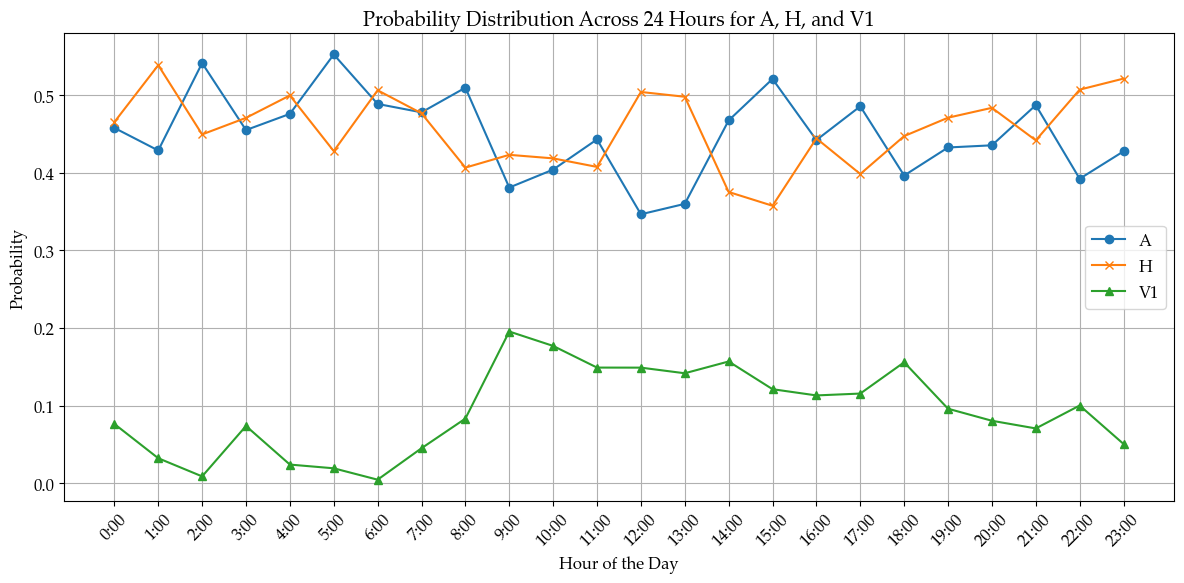

In [5]:
# raw probabilities for each hour for A, H, and V1
probabilities = [
    (0.45801, 0.465509, 0.0764814), (0.428908, 0.538814, 0.0322795), (0.541539, 0.449588, 0.00887308),
    (0.455225, 0.470947, 0.073828), (0.476072, 0.499828, 0.0240996), (0.552618, 0.428086, 0.0192963),
    (0.488875, 0.506495, 0.00462997), (0.478057, 0.476798, 0.0451465), (0.509834, 0.406805, 0.0833616),
    (0.381115, 0.423292, 0.195594), (0.404257, 0.418724, 0.177017), (0.443176, 0.407725, 0.149099),
    (0.346676, 0.504296, 0.149029), (0.360097, 0.498123, 0.14178), (0.467625, 0.375405, 0.156969),
    (0.521087, 0.357667, 0.121245), (0.44232, 0.444462, 0.113217), (0.485821, 0.398559, 0.115619),
    (0.396623, 0.44744, 0.155938), (0.432771, 0.471142, 0.0960879), (0.435562, 0.483872, 0.0805665),
    (0.487359, 0.441968, 0.0706736), (0.392469, 0.507302, 0.100229), (0.427796, 0.521541, 0.0506629)
]

# separating the probabilities for A, H, and V1
probabilities_A = [p[0] for p in probabilities]
probabilities_H = [p[1] for p in probabilities]
probabilities_V1 = [p[2] for p in probabilities]

hours = list(range(24))

# plotting the probabilities for A, H, and V1 over the 24-hour period
plt.figure(figsize=(12, 6))
plt.plot(hours, probabilities_A, label='A', marker='o')
plt.plot(hours, probabilities_H, label='H', marker='x')
plt.plot(hours, probabilities_V1, label='V1', marker='^')
plt.xticks(hours, [f"{hour}:00" for hour in hours], rotation=45)
plt.xlabel('Hour of the Day')
plt.ylabel('Probability')
plt.title('Probability Distribution Across 24 Hours for A, H, and V1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


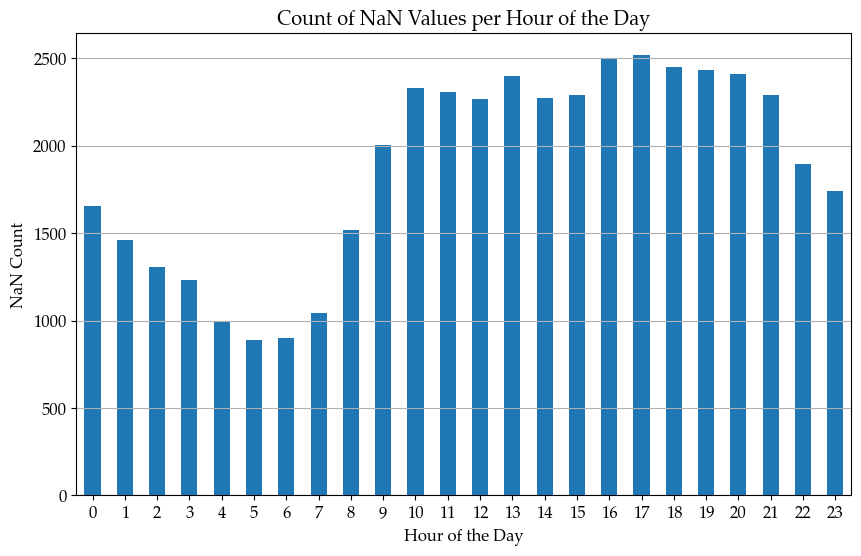

In [6]:

df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

df["hour"] = df["time_call_received"].dt.hour

# count NaNs per hour
nan_counts_per_hour = df[df["time_ambulance_dispatch_to_hospital"].isna()].groupby("hour")["time_ambulance_dispatch_to_hospital"].size()

plt.figure(figsize=(10, 6))
nan_counts_per_hour.plot(kind="bar")
plt.title("Count of NaN Values per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("NaN Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


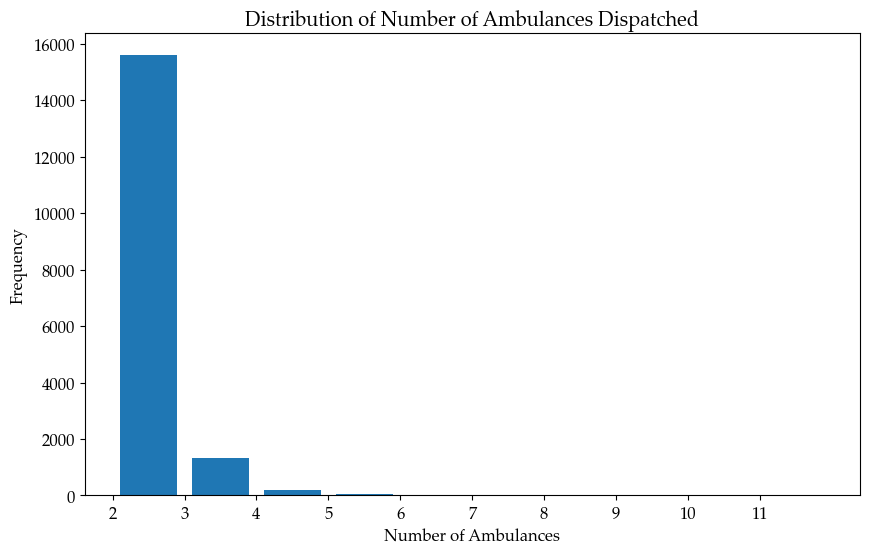

In [7]:
df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()

plt.figure(figsize=(10, 6))
plt.hist(df["resources_sent"], bins=np.arange(2, df["resources_sent"].max() + 1.5, 1), rwidth=0.8)
plt.xlabel("Number of Ambulances")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Ambulances Dispatched")
plt.xticks(np.arange(2, df["resources_sent"].max() + 1))
plt.show()


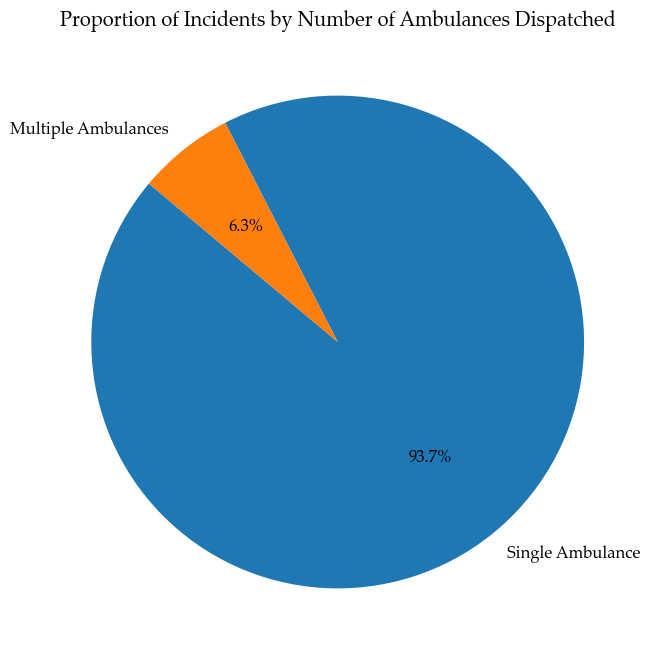

In [8]:
counts = df["resources_sent"].value_counts().sort_index()
single = counts[1] if 1 in counts else 0
multiple = counts[counts.index > 1].sum()

plt.figure(figsize=(8, 8))
plt.pie([single, multiple], labels=["Single Ambulance", "Multiple Ambulances"], autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Incidents by Number of Ambulances Dispatched")
plt.show()

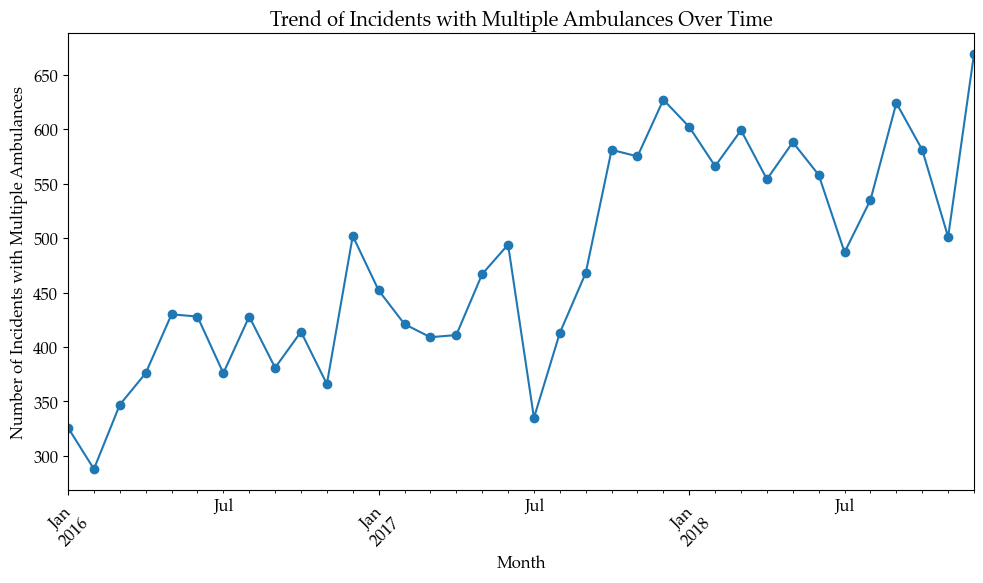

In [9]:
# count the number of incidents with multiple ambulances by month
df["Month"] = df["time_call_received"].dt.to_period("M")
multiple_ambulances_monthly = df[df["resources_sent"] > 1].groupby("Month").size()

plt.figure(figsize=(10, 6))
multiple_ambulances_monthly.plot(kind="line", marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Incidents with Multiple Ambulances")
plt.title("Trend of Incidents with Multiple Ambulances Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


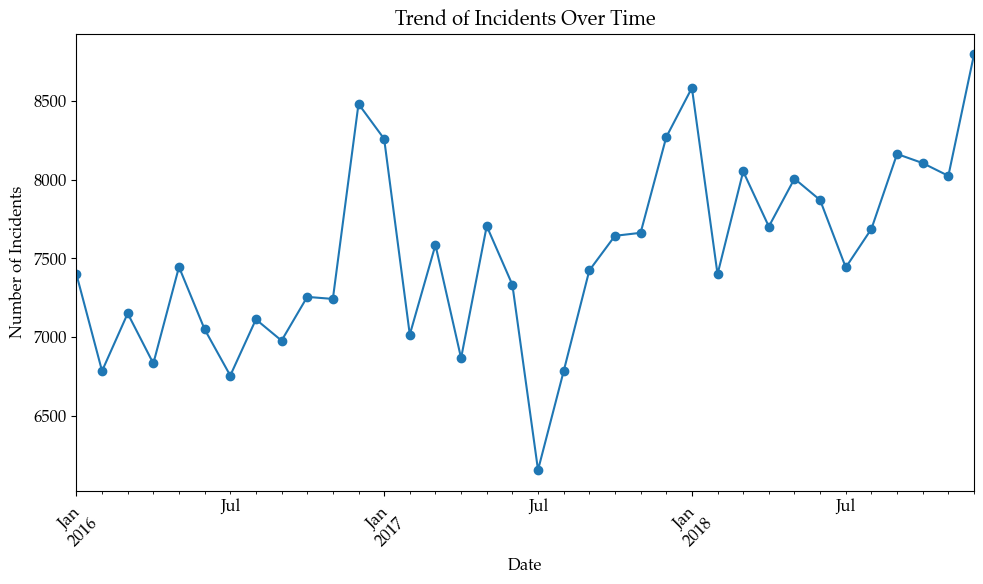

In [10]:
monthly_incidents = df.groupby("Month").size()

plt.figure(figsize=(10, 6))
monthly_incidents.plot(kind="line", marker='o')
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.title("Trend of Incidents Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


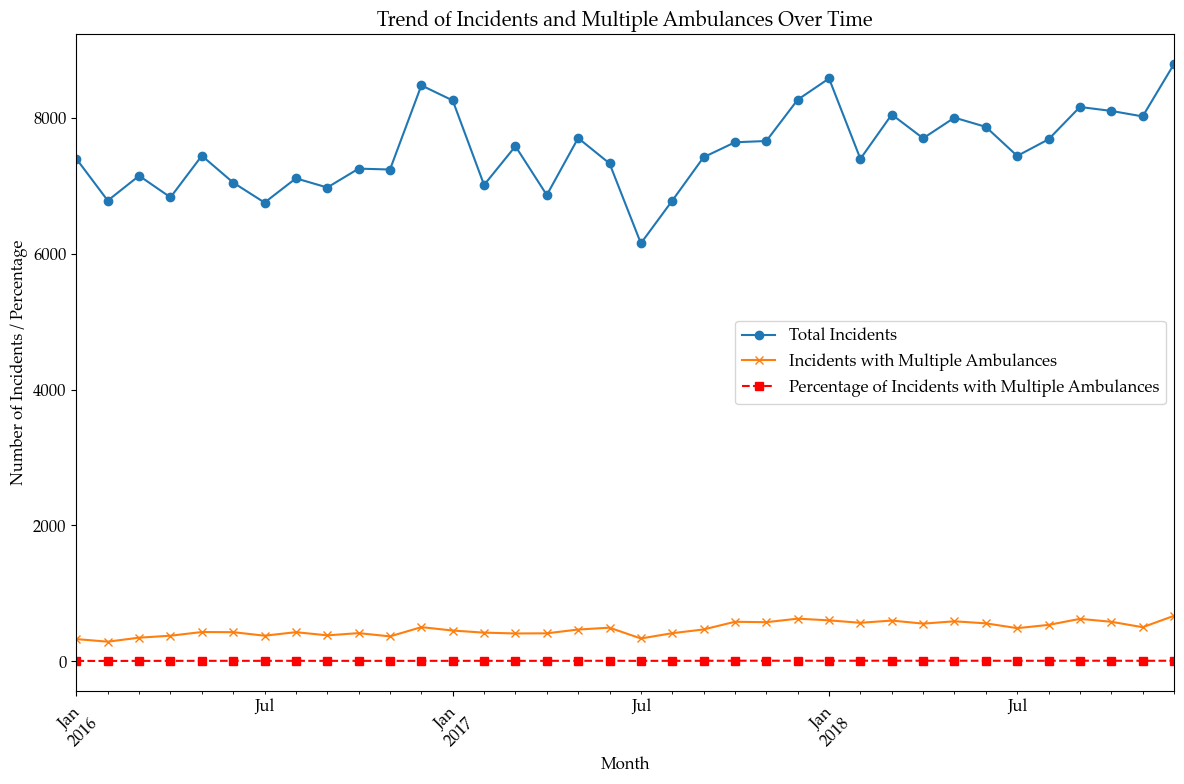

In [11]:
monthly_incidents = df.groupby("Month").size()

multiple_ambulances_monthly = df[df["resources_sent"] > 1].groupby("Month").size()

percentage_multiple_ambulances = (multiple_ambulances_monthly / monthly_incidents) * 100

plt.figure(figsize=(12, 8))

monthly_incidents.plot(kind="line", marker='o', label='Total Incidents')

multiple_ambulances_monthly.plot(kind="line", marker='x', label='Incidents with Multiple Ambulances')

percentage_multiple_ambulances.plot(kind="line", linestyle='--', marker='s', color='red', label='Percentage of Incidents with Multiple Ambulances')

plt.xlabel("Month")
plt.ylabel("Number of Incidents / Percentage")
plt.title("Trend of Incidents and Multiple Ambulances Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df = data_loader.data_preprocessor.load_enhanced_incidents_dataframe()


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271007 entries, 0 to 271006
Data columns (total 92 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   triage_impression_during_call        271007 non-null  object        
 1   resource_id                          271007 non-null  object        
 2   resource_type                        271007 non-null  object        
 3   resources_sent                       271007 non-null  int64         
 4   time_call_received                   271007 non-null  datetime64[ns]
 5   time_incident_created                271007 non-null  datetime64[ns]
 6   time_resource_appointed              271007 non-null  datetime64[ns]
 7   time_ambulance_dispatch_to_scene     271007 non-null  datetime64[ns]
 8   time_ambulance_arrived_at_scene      271007 non-null  datetime64[ns]
 9   time_ambulance_dispatch_to_hospital  225918 non-null  datetime64[ns]
 

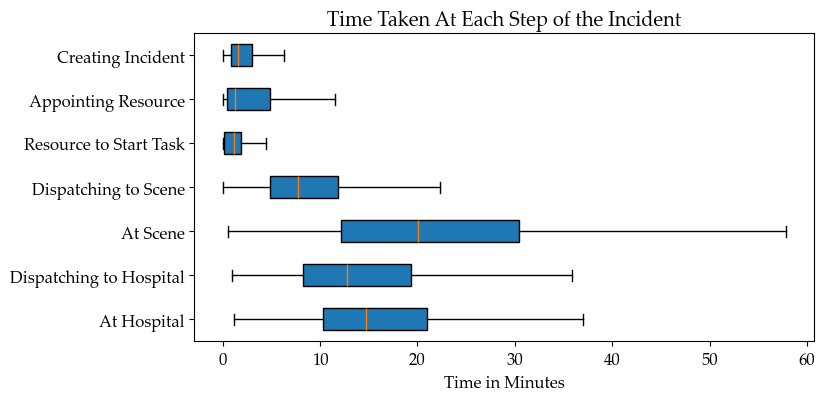

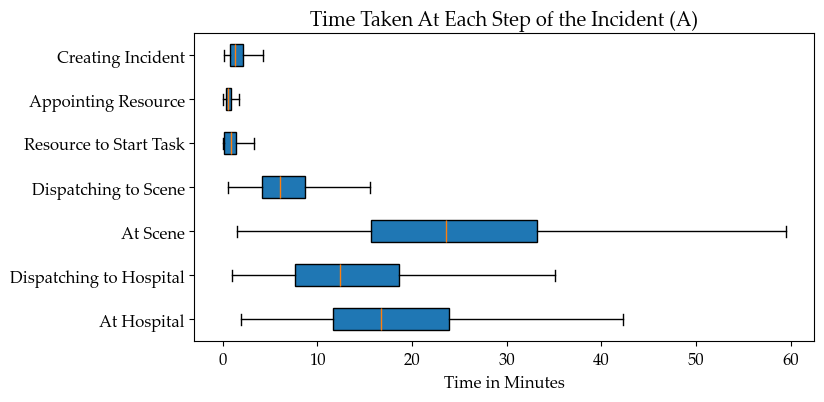

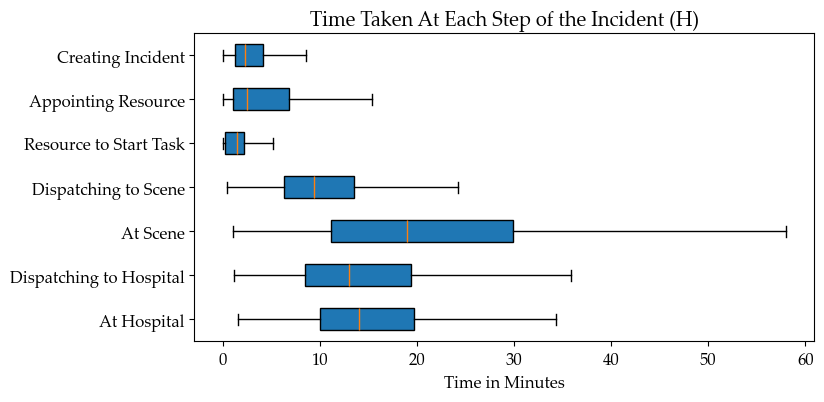

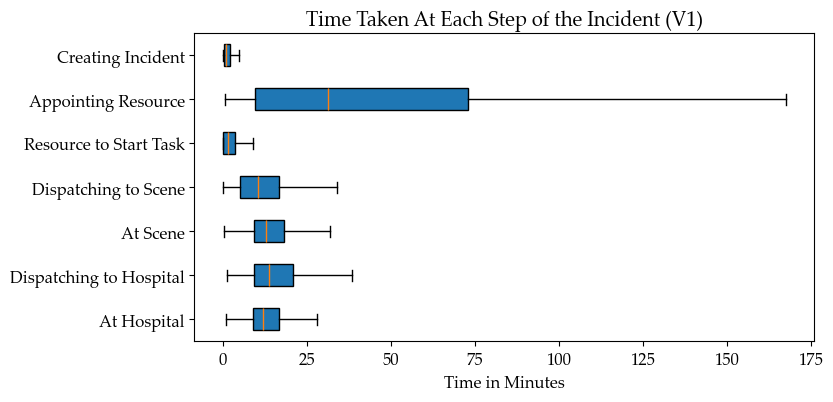

In [14]:
plotter.boxplot_time_at_steps(df)
plotter.boxplot_time_at_steps(df, triage_impression="A")
plotter.boxplot_time_at_steps(df, triage_impression="H")
plotter.boxplot_time_at_steps(df, triage_impression="V1")


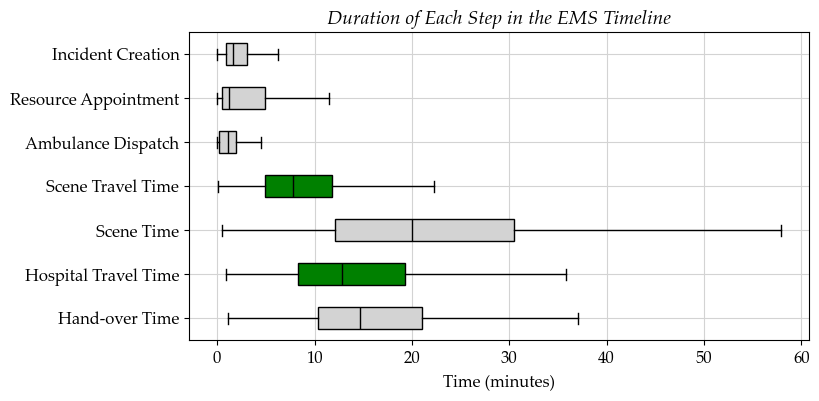

In [15]:
title = "Duration of Each Step in the EMS Timeline"

temp_df = data_preprocessor.load_enhanced_incidents_dataframe().copy()

steps = {
    "Incident Creation": ("time_call_received", "time_incident_created"),
    "Resource Appointment": ("time_incident_created", "time_resource_appointed"),
    "Ambulance Dispatch": ("time_resource_appointed", "time_ambulance_dispatch_to_scene"),
    "Scene Travel Time": ("time_ambulance_dispatch_to_scene", "time_ambulance_arrived_at_scene"),
    "Scene Time": ("time_ambulance_arrived_at_scene", "time_ambulance_dispatch_to_hospital", "time_ambulance_available"),
    "Hospital Travel Time": ("time_ambulance_dispatch_to_hospital", "time_ambulance_arrived_at_hospital"),
    "Hand-over Time": ("time_ambulance_arrived_at_hospital", "time_ambulance_available")
}

for step, times in steps.items():
    if len(times) == 3:
        temp_df.loc[temp_df[times[1]].isna(), step] = (temp_df[times[2]] - temp_df[times[0]]).dt.total_seconds() / 60
        temp_df.loc[~temp_df[times[1]].isna(), step] = (temp_df[times[1]] - temp_df[times[0]]).dt.total_seconds() / 60
    else:
        temp_df[step] = (temp_df[times[1]] - temp_df[times[0]]).dt.total_seconds() / 60

plot_data = [temp_df[step].dropna() for step in steps if step not in ["Dispatching to Hospital", "At Hospital"]]
labels = [key for key in steps.keys() if key not in ["Dispatching to Hospital", "At Hospital"]]

plt.figure(figsize=(8, 4))
boxprops = dict(color='black')
medianprops = dict(color='black')
patch_colors = ['lightgray'] * 1 + ['green'] + ["lightgray"] + ['green'] + 3 * ['lightgray']

bp = plt.boxplot(plot_data[::-1], labels=labels[::-1], vert=False, patch_artist=True, showfliers=False, boxprops=boxprops, medianprops=medianprops)

for patch, color in zip(bp['boxes'], patch_colors):
    patch.set_facecolor(color)

plt.title(title, fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
plt.xlabel("Time (minutes)")
plt.xticks()
plt.grid(True, color='lightgray')
plt.savefig('./plots/ems_timestage_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
dataframe = data_preprocessor.load_processed_incidents_dataframe()
dataframe = data_preprocessor._remove_duplicates(dataframe)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)
dataframe = data_preprocessor._remove_outside_region(dataframe)
#dataframe = data_preprocessor._remove_other_resource_types(dataframe)
#dataframe = data_preprocessor._count_resources_sent(dataframe)
#dataframe = data_preprocessor._remove_extra_resources(dataframe)

dataframe['triage_impression_during_call'] = dataframe['triage_impression_during_call'].replace(['V1', 'V2'], 'V')
dataframe['year'] = dataframe['time_call_received'].dt.year
dataframe = dataframe.groupby(['year', 'triage_impression_during_call']).size().unstack(fill_value=0)


In [17]:
data_to_compare = {
    "triage_impression_during_call": ["A", "H", "V"],
    "2016": [65878, 53975, 34816],
    "2017": [68413, 54419, 35679],
    "2018": [72253, 58921, 36923]
}
dataframe_to_compare = pd.DataFrame(data_to_compare).set_index("triage_impression_during_call").T

dataframe.index = dataframe.index.map(str)

dataframe["A SSB"] = dataframe_to_compare["A"]
dataframe["H SSB"] = dataframe_to_compare["H"]
dataframe["V SSB"] = dataframe_to_compare["V"]


,A % Difference,H % Difference,V % Difference
year,,,
2016,-12.834330,-5.117184,-21.783088
2017,-13.608525,-4.097833,-21.746686
2018,-15.733603,-4.612956,-20.098584


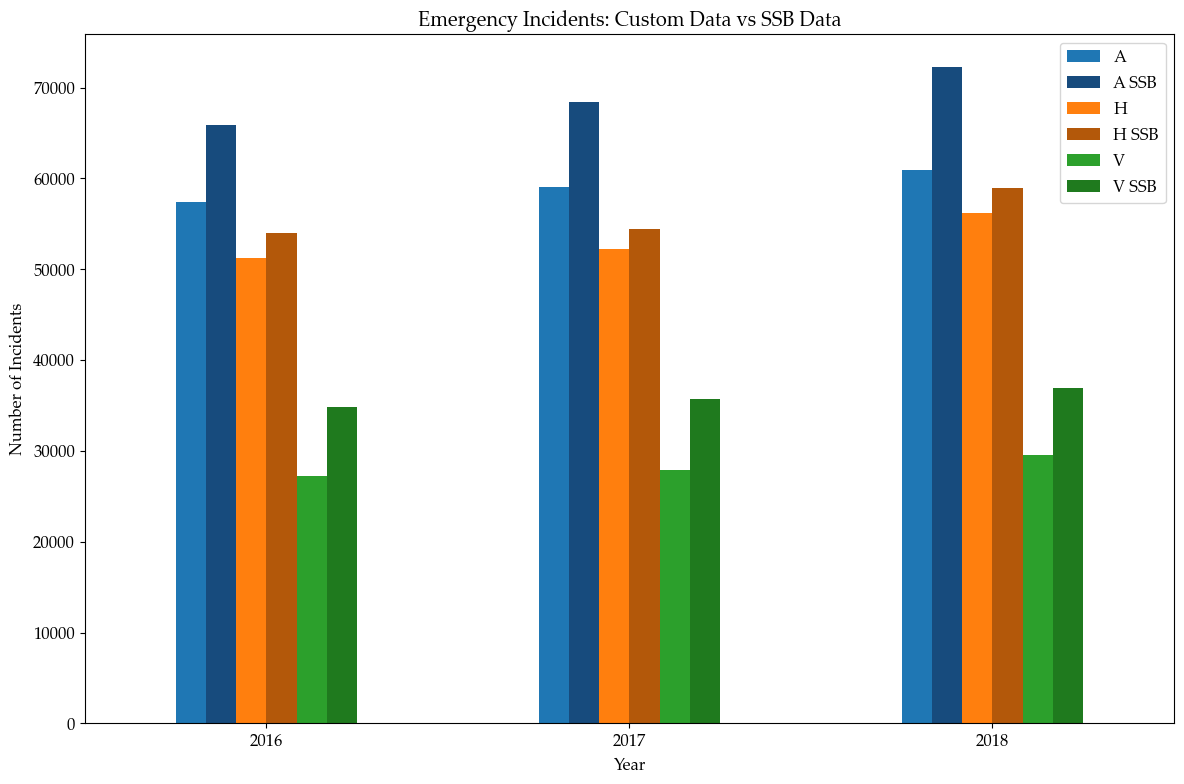

In [18]:
colors = ["#1f77b4", "#174b7d", "#ff7f0e", "#b3580a", "#2ca02c", "#1f7a1e"]
fig, ax = plt.subplots(figsize=(12, 8))
dataframe[['A', 'A SSB', 'H', 'H SSB', 'V', 'V SSB']].plot(kind='bar', ax=ax, color=colors)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Incidents")
ax.set_title("Emergency Incidents: Custom Data vs SSB Data")
plt.xticks(rotation=0)
plt.legend(["A", "A SSB", "H", "H SSB", "V", "V SSB"], loc="upper right")
plt.tight_layout()

# calculate and print percentage differences
percentage_diff = (dataframe[['A', 'H', 'V']] - dataframe[['A SSB', 'H SSB', 'V SSB']].values) / dataframe[['A SSB', 'H SSB', 'V SSB']].values * 100
percentage_diff.columns = ['A % Difference', 'H % Difference', 'V % Difference']
percentage_diff


In [19]:
total_diff = (dataframe[['A', 'H', 'V']].values.sum() - dataframe[['A SSB', 'H SSB', 'V SSB']].values.sum()) / dataframe[['A SSB', 'H SSB', 'V SSB']].values.sum() * 100
total_diff


-12.38517527328337

In [20]:
df = data_preprocessor.load_clean_incidents_dataframe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754811 entries, 0 to 754810
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   hastegrad         754802 non-null  object        
 1   tidspunkt         754811 non-null  datetime64[ns]
 2   tiltak_opprettet  754811 non-null  datetime64[ns]
 3   ressurs_id        754811 non-null  object        
 4   tiltak_type       754811 non-null  object        
 5   varslet           754333 non-null  datetime64[ns]
 6   rykker_ut         731707 non-null  datetime64[ns]
 7   ank_hentested     665649 non-null  datetime64[ns]
 8   avg_hentested     560737 non-null  datetime64[ns]
 9   ank_levsted       557995 non-null  datetime64[ns]
 10  ledig             754747 non-null  datetime64[ns]
 11  ssbid1000M        754811 non-null  int64         
 12  xcoor             754811 non-null  int64         
 13  ycoor             754811 non-null  int64         
 14  popT

In [21]:
temp_df = df.drop_duplicates(subset="ssbid1000M")

temp_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5089 entries, 0 to 754612
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   hastegrad         5089 non-null   object        
 1   tidspunkt         5089 non-null   datetime64[ns]
 2   tiltak_opprettet  5089 non-null   datetime64[ns]
 3   ressurs_id        5089 non-null   object        
 4   tiltak_type       5089 non-null   object        
 5   varslet           5080 non-null   datetime64[ns]
 6   rykker_ut         4181 non-null   datetime64[ns]
 7   ank_hentested     1773 non-null   datetime64[ns]
 8   avg_hentested     1773 non-null   datetime64[ns]
 9   ank_levsted       1769 non-null   datetime64[ns]
 10  ledig             5088 non-null   datetime64[ns]
 11  ssbid1000M        5089 non-null   int64         
 12  xcoor             5089 non-null   int64         
 13  ycoor             5089 non-null   int64         
 14  popTot            5089 non-

In [22]:
utm_to_population = {tuple(x + 500 for x in utils.id_to_utm(grid_id)): pop for grid_id, pop in zip(temp_df["ssbid1000M"], temp_df["popTot"])}


In [23]:
print(utm_to_population)


{(264500, 6631500): 102, (242500, 6641500): 1329, (265500, 6640500): 1540, (264500, 6652500): 6153, (253500, 6621500): 592, (279500, 6652500): 2151, (262500, 6654500): 3214, (274500, 6650500): 1836, (265500, 6627500): 2138, (262500, 6649500): 6456, (276500, 6679500): 80, (283500, 6639500): 1745, (261500, 6649500): 1123, (270500, 6653500): 2636, (268500, 6652500): 4331, (248500, 6653500): 2730, (247500, 6655500): 1592, (258500, 6656500): 589, (289500, 6687500): 1767, (293500, 6694500): 663, (267500, 6649500): 4316, (265500, 6641500): 4091, (280500, 6650500): 2124, (281500, 6676500): 13, (280500, 6648500): 151, (248500, 6648500): 1731, (266500, 6645500): 2047, (264500, 6651500): 11537, (262500, 6650500): 15881, (263500, 6650500): 19938, (261500, 6651500): 13587, (260500, 6651500): 9635, (257500, 6651500): 3470, (249500, 6648500): 2301, (259500, 6613500): 29, (289500, 6678500): 56, (267500, 6646500): 4845, (276500, 6650500): 1175, (248500, 6651500): 2604, (255500, 6647500): 2407, (266500,

In [24]:
math.dist((264500, 6631500), (265500, 6632500))


1414.213562373095

In [25]:
target_utm = (279500, 6652500)
distance_km = 10.0
total_pop = 0

for utm, population in utm_to_population.items():
    if (math.dist(utm, target_utm) <= (distance_km * 1000)):
        total_pop += population

print(total_pop)


195103


In [26]:
grid_count = df["ssbid1000M"].value_counts()

grid_dict = {tuple(x + 500 for x in utils.id_to_utm(grid_id)): count for grid_id, count in grid_count.items()}

print(grid_dict)


{(262500, 6649500): 49874, (273500, 6582500): 21820, (276500, 6650500): 17295, (260500, 6653500): 15341, (248500, 6648500): 10570, (262500, 6651500): 9811, (263500, 6649500): 8920, (267500, 6570500): 8245, (278500, 6578500): 7401, (256500, 6597500): 7068, (268500, 6570500): 6760, (263500, 6652500): 6604, (261500, 6650500): 6465, (283500, 6611500): 6442, (263500, 6650500): 6352, (264500, 6652500): 6009, (261500, 6649500): 5910, (262500, 6650500): 5434, (266500, 6628500): 5405, (260500, 6651500): 5264, (263500, 6651500): 4999, (278500, 6652500): 4971, (264500, 6651500): 4844, (287500, 6673500): 4834, (261500, 6652500): 4646, (272500, 6654500): 4403, (260500, 6650500): 4348, (260500, 6649500): 4316, (293500, 6559500): 4093, (264500, 6648500): 3865, (259500, 6652500): 3778, (265500, 6647500): 3746, (257500, 6651500): 3732, (270500, 6654500): 3660, (261500, 6651500): 3457, (292500, 6560500): 3430, (269500, 6654500): 3316, (259500, 6651500): 3199, (264500, 6649500): 3133, (279500, 6653500): 

In [27]:
df = data_preprocessor.load_enhanced_incidents_dataframe()


In [28]:

print(df["urban_settlement_ssb"].sum() / df.shape[0])
print(df["urban_settlement_fhi"].sum() / df.shape[0])


0.9193452567645855
0.9943138000125458


In [29]:
processed_depots_df = data_preprocessor.load_enhanced_depots_dataframe()
processed_depots_df["total_population_cluster"] = 0
processed_depots_df["total_incidents_cluster"] = 0


In [30]:
clean_incidents_df = data_preprocessor.load_clean_incidents_dataframe()
clean_incidents_df = clean_incidents_df.drop_duplicates(subset="ssbid1000M")

utm_to_population = {tuple(x + 500 for x in utils.id_to_utm(grid_id)): pop for grid_id, pop in zip(clean_incidents_df["ssbid1000M"], clean_incidents_df["popTot"])}


In [31]:
use_enhanced = True

if use_enhanced:
    incidents_df = data_preprocessor.load_enhanced_incidents_dataframe()
else:
    incidents_df = data_preprocessor.load_processed_incidents_dataframe()

grid_count = incidents_df["grid_id"].value_counts()

utm_to_incidents = {tuple(x + 500 for x in utils.id_to_utm(grid_id)): count for grid_id, count in grid_count.items()}


In [32]:
for incident_utm, population in utm_to_population.items():
    min_distance = float('inf')
    closest_depot_index = -1

    for depot_index, depot in processed_depots_df.iterrows():
        if (depot["type"] != "Depot" and depot["type"] != "Beredskapspunkt"):
            continue

        depot_utm = (depot["x"] + 500, depot["y"] + 500)

        distance = math.dist(incident_utm, depot_utm)

        if (closest_depot_index == -1 or distance < min_distance):
            closest_depot_index = depot_index
            min_distance = distance
    
    processed_depots_df.at[closest_depot_index, "total_population_cluster"] += population


In [33]:
for incident_utm, incidents in utm_to_incidents.items():
    min_distance = float('inf')
    closest_depot_index = -1

    for depot_index, depot in processed_depots_df.iterrows():
        if (depot["type"] != "Depot" and depot["type"] != "Beredskapspunkt"):
            continue

        depot_utm = (depot["x"] + 500, depot["y"] + 500)

        distance = math.dist(incident_utm, depot_utm)

        if (closest_depot_index == -1 or distance < min_distance):
            closest_depot_index = depot_index
            min_distance = distance
    
    processed_depots_df.at[closest_depot_index, "total_incidents_cluster"] += incidents


In [34]:
processed_depots_df.head(n=19)


,name,type,grid_id,x,y,longitude,latitude,region,urban_settlement_ssb,urban_settlement_fhi,total_population_radius_2km,total_population_radius_5km,total_incidents_radius_2km,total_incidents_radius_5km,total_population_cluster,total_incidents_cluster
0,Eidsvoll,Depot,22870006692000,287000,6692000,11.143840,60.308508,Akershus,False,True,703,9276,184,2403,59655,7947
1,Ullensaker,Depot,22860006671000,286000,6671000,11.147942,60.119853,Akershus,False,True,371,22304,71,5728,39183,9001
2,Nes,Depot,23040006669000,304000,6669000,11.473116,60.110949,Akershus,True,True,3503,7038,2066,2659,39336,4692
3,Aurskog-Høland,Depot,23070006642000,307000,6642000,11.552277,59.870377,Akershus,True,True,2510,3950,957,1207,27475,3421
4,Nittedal,Depot,22700006663000,270000,6663000,10.869767,60.039527,Akershus,True,True,4232,10310,999,1632,22295,2806
5,Lørenskog,Depot,22750006650000,275000,6650000,10.973481,59.925857,Akershus,True,True,22285,99975,8054,23462,88238,21003
6,Asker,Depot,22440006641000,244000,6641000,10.431740,59.827227,Akershus,True,True,19210,45869,3993,7841,109497,8078
7,Bærum,Depot,22480006648000,248000,6648000,10.494379,59.892343,Akershus,True,True,19485,73313,6246,14334,69950,12980
8,Smestad,Depot,22590006652000,259000,6652000,10.685736,59.934726,Oslo,True,True,47646,295462,10810,82130,110375,21180
9,Ullevål,Depot,22610006652000,261000,6652000,10.721422,59.935890,Oslo,True,True,86090,361726,19065,98093,104165,21200


In [35]:
# gathered from SSB
population_data = {
    "Date": ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01"],
    "Akershus Population": [584899, 594533, 604368, 614026, 624055],
    "Oslo Population": [647676, 658390, 666759, 673469, 681067]
}

pop_df = pd.DataFrame(population_data)
pop_df['Date'] = pd.to_datetime(pop_df['Date'])
pop_df.set_index('Date', inplace=True)

In [36]:
# gathered from SSB
ambulance_data = {
    "Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Total Ambulance Missions": [131825, 139777, 142785, 140363, 146300, 154669, 158511, 168097, 176594, 172944, 183454, 180462],
    "Acute Ambulance Missions": [50918, 55536, 58419, 55636, 60412, 65878, 68413, 72253, 77486, 79010, 89499, 95909],
    "Urgent Ambulance Missions": [40152, 44773, 46928, 50190, 50819, 53975, 54419, 58921, 63685, 60416, 59917, 52507],
    "Non-Urgent Ambulance Missions": [40755, 39468, 37438, 34537, 35069, 34816, 35679, 36923, 35423, 33518, 34038, 32046]
}

population_data = {
    "Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Population": [599230, 613285, 623966, 634463, 647676, 658390, 666759, 673469, 681067, 693494, 697010, 699827]
}

df_ambulance = pd.DataFrame(ambulance_data).set_index("Year")
df_population = pd.DataFrame(population_data).set_index("Year")

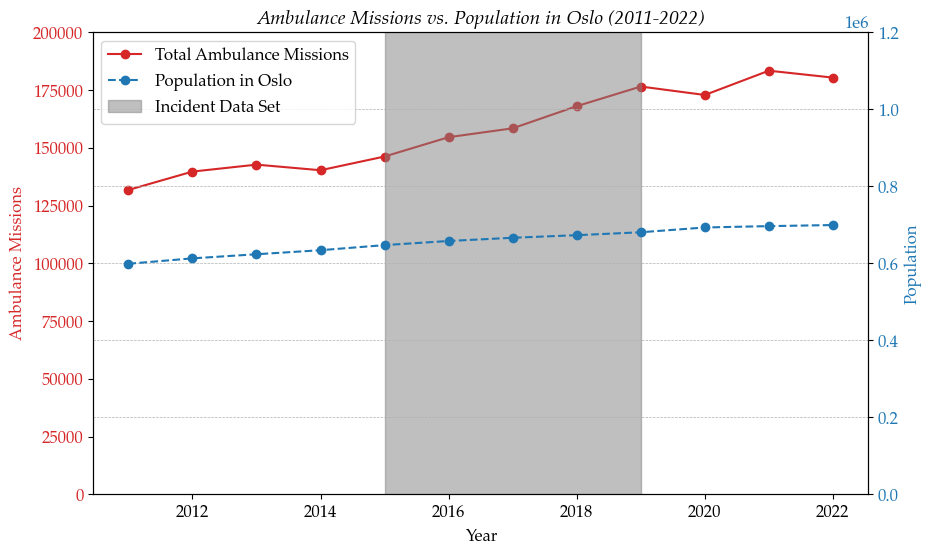

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))

y_lim_top = 200000

color1 = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Ambulance Missions', color=color1)
ax1.set_ylim(bottom=0, top=y_lim_top)
ax1.plot(df_ambulance.index, df_ambulance['Total Ambulance Missions'], label='Total Ambulance Missions', color=color1, marker='o')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Population', color=color2)
ax2.set_ylim(bottom=0, top=y_lim_top*6)
ax2.plot(df_population.index, df_population['Population'], label='Population in Oslo', color=color2, linestyle='--', marker='o')
ax2.tick_params(axis='y', labelcolor=color2)

plt.axvspan(2015, 2019, color='grey', alpha=0.5, label='Incident Data Set')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

incident_patch = mpatches.Patch(color='grey', alpha=0.5, label='Incident Data Set')

plt.legend(handles=handles1+handles2, loc='upper left')

plt.title('Ambulance Missions vs. Population in Oslo (2011-2022)', fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('./plots/ambulance_mission_vs_population.png', dpi=300, bbox_inches='tight')

plt.show()


In [38]:
dataframe = data_preprocessor.load_enhanced_incidents_dataframe()

print(dataframe["x"].min())
print(dataframe["x"].max())
print()
print(dataframe["y"].min())
print(dataframe["y"].max())


239500
321500

6602500
6719500


In [49]:
gdf_oslo_bounds = utils.get_bounds(file_paths=[os.path.join(constants.PROJECT_DIRECTORY_PATH, "data", "ssb_2019_oslo_polygon_epsg4326.geojson")])
gdf_akershus_bounds = utils.get_bounds(file_paths=[os.path.join(constants.PROJECT_DIRECTORY_PATH, "data", "ssb_2019_akershus_polygon_epsg4326.geojson")])


In [50]:
centroids = [(x, y) for x in list(range(200500, 400500, 1000)) for y in list(range(6600500, 6800500, 1000))]
print(len(centroids))

filtered_centroids = set()
for (x, y) in centroids:
    for latitude, longitude in utils.get_cell_corners(x, y):
        point = shapely.geometry.Point(longitude, latitude)
        if gdf_oslo_bounds.contains(point).any() or gdf_akershus_bounds.contains(point).any():
            filtered_centroids.add((x, y))

print(len(filtered_centroids))


40000
5850
